In [ ]:
PROJETO UNIDADE3 COMPUTAÇÃO NUMÉRICA

In [ ]:
Aluno: Daniel Medeiros Soares Carneiro (20220012347)

In [ ]:
QUESTÃO 1: 

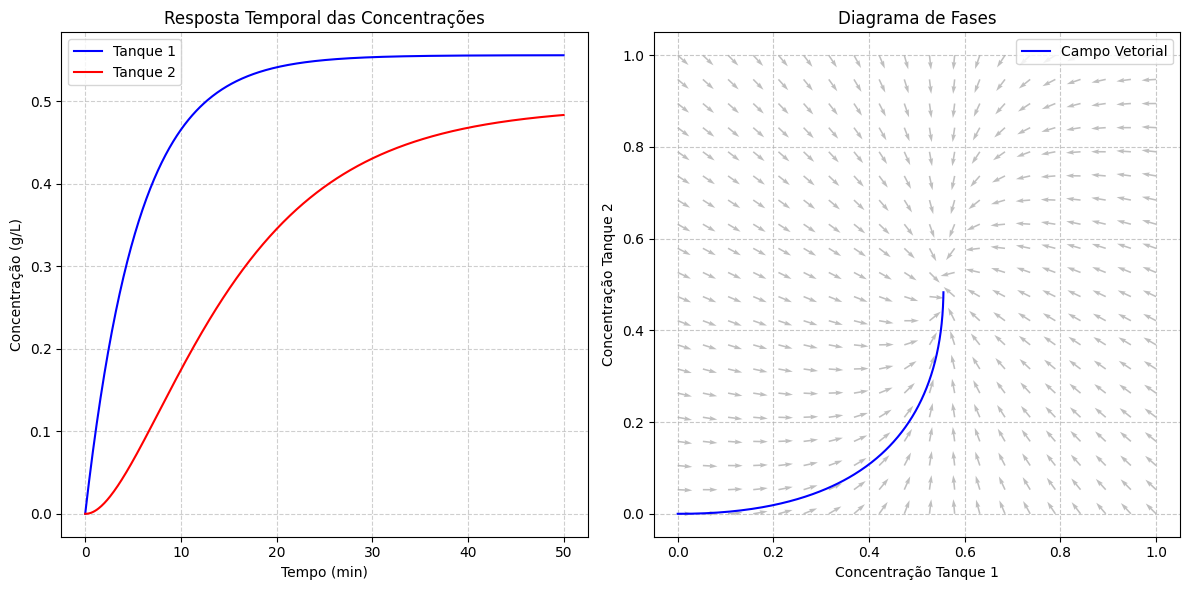

Concentração final no Tanque 1: 0.5555 g/L
Concentração final no Tanque 2: 0.4831 g/L


In [1]:
import numpy as np
import matplotlib.pyplot as plt


V1 = V2 = 100
Qin = 10
Q12 = 8
Qout = 1
Cin = 1

C1_0 = 0
C2_0 = 0

ti = 0
tf = 50
dt = 0.1
n_passos = int((tf - ti) / dt) + 1


tempo = np.linspace(ti, tf, n_passos)
C1 = np.zeros(n_passos)
C2 = np.zeros(n_passos)
C1[0] = C1_0
C2[0] = C2_0



for i in range(n_passos - 1):

    dC1_dt = (Qin / V1) * (Cin - C1[i]) - (Q12 / V1) * C1[i]
    dC2_dt = (Q12 / V2) * (C1[i] - C2[i]) - (Qout / V2) * C2[i]


    C1[i+1] = C1[i] + dt * dC1_dt
    C2[i+1] = C2[i] + dt * dC2_dt


c1_valores = np.linspace(0, Cin, 20)
c2_valores = np.linspace(0, Cin, 20)
C1_grid, C2_grid = np.meshgrid(c1_valores, c2_valores)

# Campo vetorial
dC1 = (Qin / V1) * (Cin - C1_grid) - (Q12 / V1) * C1_grid
dC2 = (Q12 / V2) * (C1_grid - C2_grid) - (Qout / V2) * C2_grid

# Manter as setas com o mesmo tamanho (vetor unitário)
norma = np.sqrt(dC1**2 + dC2**2)
dC1_normalizado = dC1 / norma
dC2_normalizado = dC2 / norma



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tempo, C1, color="blue", label='Tanque 1')
plt.plot(tempo, C2, color="red", label='Tanque 2')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.title('Resposta Temporal das Concentrações')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)


plt.subplot(1, 2, 2)
plt.plot(C1, C2, color="blue", label="Campo Vetorial")
plt.quiver(C1_grid, C2_grid, dC1_normalizado, dC2_normalizado, color='grey', alpha=0.5)
plt.xlabel('Concentração Tanque 1')
plt.ylabel('Concentração Tanque 2')
plt.title('Diagrama de Fases')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


print(f"Concentração final no Tanque 1: {C1[-1]:.4f} g/L")
print(f"Concentração final no Tanque 2: {C2[-1]:.4f} g/L")


#Explicação:

#